<a href="https://colab.research.google.com/github/celacarney/Linear-Algebra-Projects/blob/main/Copy_of_Task_BreastCancer_Perimeter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task: Checking a Theory: Area ~ Perimeter


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

Consider the well-known Wisconsin Breast Cancer dataset that is commonly used by those studying machine learning.  This data includes a wide variety of characteristics measured on the nuclei of cells found in breast-tissue.  Here, only a small subset of the orginal set of characteristics will be considered. 

<ul>
  <li><strong>Response Variable</strong>: Area = estimated area of cell</li>
  <li><strong>Predictor Variables</strong>: </li>
  <ul>
    <li>Radius: estimated radius of cell</li>
    <li>Perimeter: estimted perimeter of cell</li>
    <li>Type: Benign or Malignant</li>
    <ul><u>Note</u>: In reality, cell type would likely be the response variable.</li>
  </ul>
</ul>
<br><br>

<table align="center">
  <tr>
    <td width='50%' align="center" valign="top"><strong>Benign (Non-cancerous)</strong></td>
    <td width='50%' align="center" valign="top"><strong>Malignant (Cancerous)</strong></td>
  </tr>
  <tr>
        <td width='50%' align="center" valign="top"><img src="https://drive.google.com/uc?export=view&id=15FVS34R8fqlyVJK3xGzWLadSb5iUYjU1"></img>
        </td>
         <td width='50%' align="center" valign="top"><img src="https://drive.google.com/uc?export=view&id=1665CJjr4sDA50FaS0rVd5Q8djMRUSg8M"></img>
        </td>
</tr>
</table>

<font size="-2"><u>Original Source</u>: W.N. Street, W.H. Wolberg and O.L. Mangasarian Nuclear feature extraction for breast tumor diagnosis.  IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.</font>


Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Theoretical Considerations

Generally speaking, cells tend to be circular in shape.  Thus, a known relationship may exist between the cell area and the cell radius.  In particular, the following relationships hold true if cells are truely cicular in shape.

<table align="center">
  <tr>
    <td colspan="2" align="center" valign="top"><font size="+1">Methods for Estimating Area</font></td>
  </tr>
  <tr>
    <td align="center" valign="top"><font size="+1">Using Radius</font><br>
    <img src="https://drive.google.com/uc?export=view&id=1M8_LscIImaw4XYSfD81vjYqMIW-mZ_Q_"></img>
    </td>
    <td align="center" valign="top"><font size="+1">Using Perimeter</font><br>
    <img src="https://drive.google.com/uc?export=view&id=1fdFfAtb6Ibq6AHcaFoGJXPtSMrVrHLi7"></img>
    </td>
  </tr>
  <tr>
    <td align="center" valign="top"><font size="+1">Area = &#960; * Radius<sup>2</sup></font></td>
    <td align="center" valign="top"><font size="+1">Perimeter = 2&#960; * Radius</font></td>
  </tr>

</table>




## Loading the Data

First, loading the tidyverse() package into this COLAB session.

In [ ]:
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The **read_csv()** function is used to read in the dataset. 

In [ ]:
# Reading data in using read.csv via Base 
BreastCancer <- read_csv("http://www.StatsClass.org/stat360/Datasets/BreastCancer.csv")

Rows: 569 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Type
dbl (4): RowID, Radius, Perimeter, Area

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# View the first few rows of data
head(BreastCancer)

RowID,Type,Radius,Perimeter,Area
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,Malignant,17.99,122.80,1001.0
2,Malignant,20.57,132.90,1326.0
3,Malignant,19.69,130.00,1203.0
4,Malignant,11.42,77.58,386.1
5,Malignant,20.29,135.10,1297.0
6,Malignant,12.45,82.57,477.1


## Questions

1.   Create a scatterplot of Area vs Perimeter.  Discuss the relationship between these two variables. 

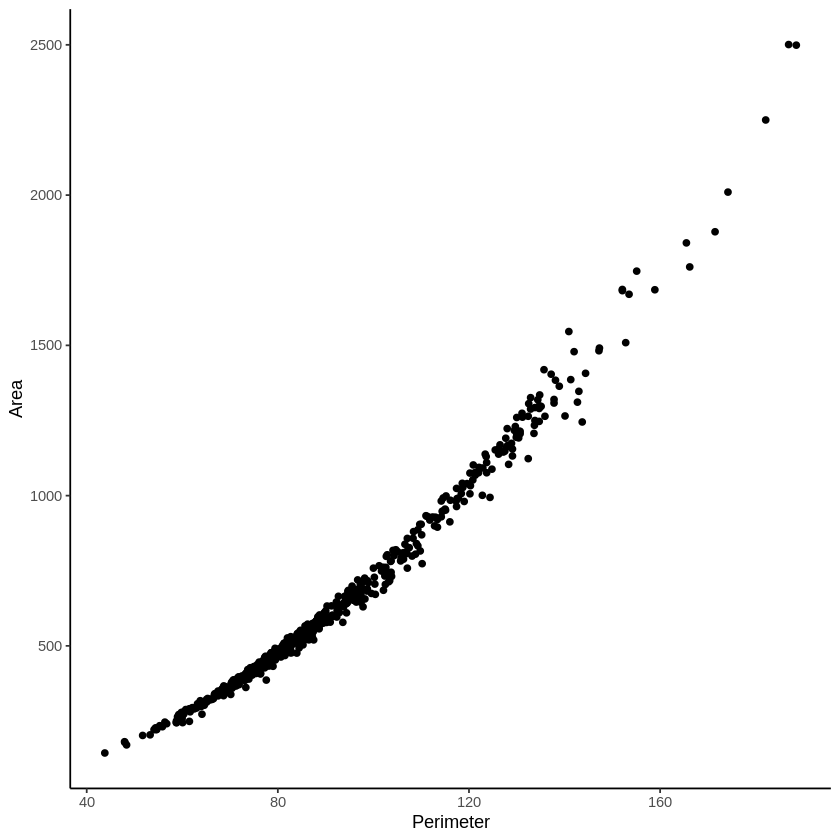

In [ ]:
#Adding the mean function to the scatterplot of Area ~ Radius
ggplot(data=BreastCancer, aes(x=Perimeter, y=Area)) + 
  geom_point() + 
  #geom_line(aes(x=Perimeter, y=Area)) + 
  theme_classic()

**As perimter increases, area increases. Strong positive and non linear relationship.**

2.   Next, create a second scatterplot of Area vs Perimeter.  Color code the points by Type.  Disucss what is learned from this plot.

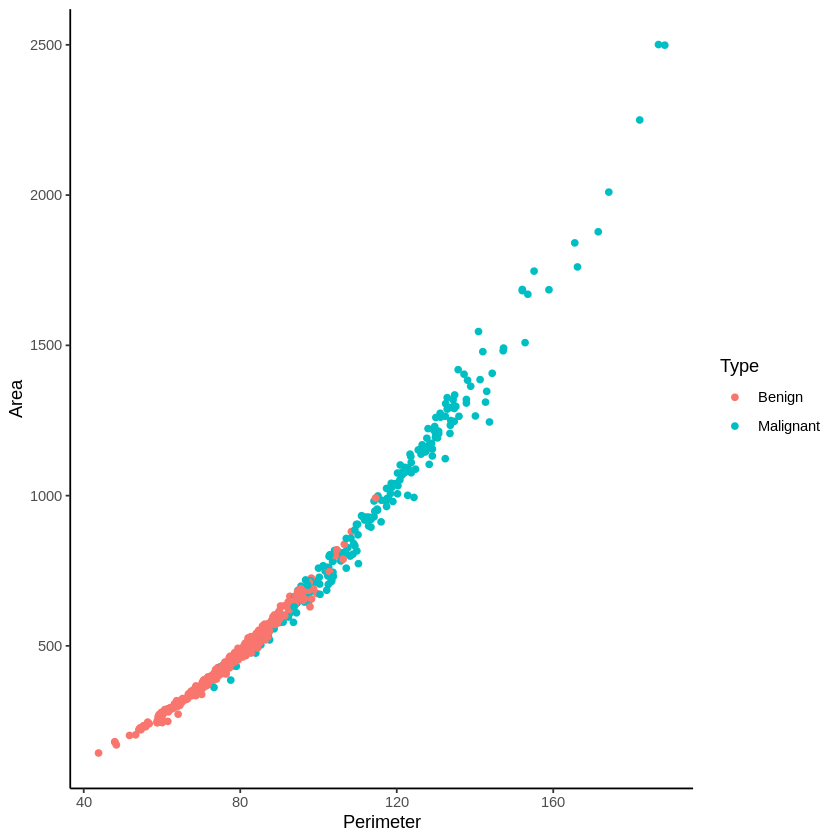

In [ ]:
#Getting a scatterplot of Area ~ Radius
ggplot(data=BreastCancer, aes(x=Perimeter, y=Area, col=Type)) + 
  geom_point() + 
  theme_classic()

**Benign cells tend to have smaller perimeter and area compared to malignant.**

3.   Write the theory based estimated mean function for the relationship between Area and Perimeter (assuming a circle is appropriate).

$$
E(Area | Perimeter) = Perimeter^2/ 4pi 



4.  Add the theory based estimated mean function to the scatterplot created in Question #1.  Does this mean function appear to fit the data well?  Discuss.

In [ ]:
#Computing the Mean for Area using theory based function
# Mean = pi * radius^2
(BreastCancer
  %>% mutate(
              Estimated_Area = Perimeter^2 / (4*pi)
            )
) -> BreastCancer_with_EstimatedArea

head(BreastCancer_with_EstimatedArea)

RowID,Type,Radius,Perimeter,Area,Estimated_Area
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Malignant,17.99,122.80,1001.0,1200.0155
2,Malignant,20.57,132.90,1326.0,1405.5299
3,Malignant,19.69,130.00,1203.0,1344.8593
4,Malignant,11.42,77.58,386.1,478.9495
5,Malignant,20.29,135.10,1297.0,1452.4488
6,Malignant,12.45,82.57,477.1,542.5437


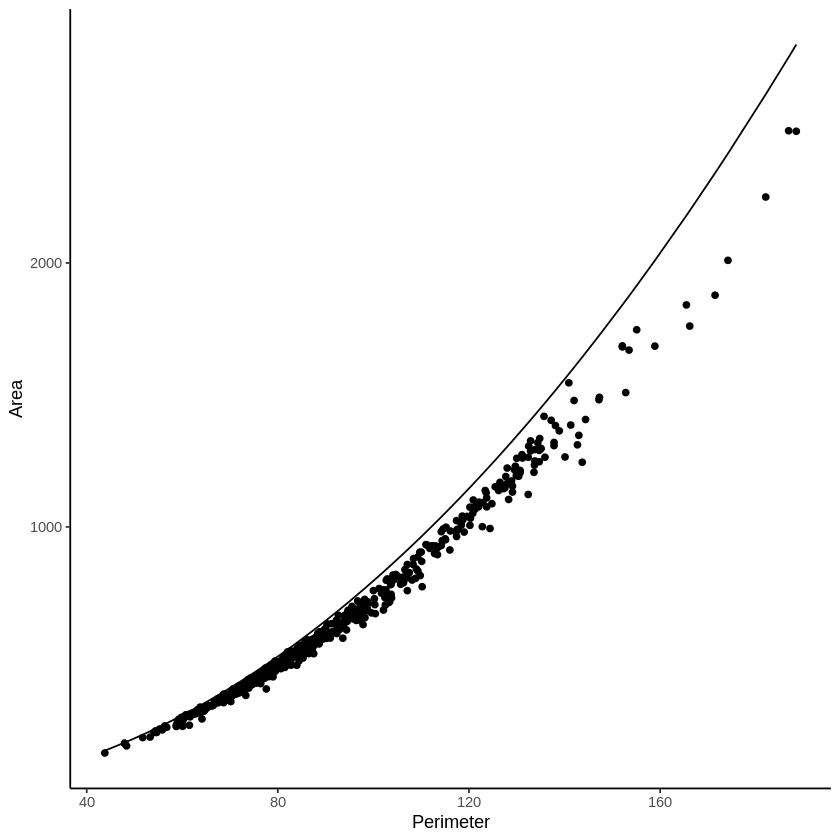

In [ ]:
#Adding the mean function to the scatterplot of Area ~ Radius
ggplot(data=BreastCancer_with_EstimatedArea, aes(x=Perimeter, y=Area)) + 
  geom_point() + 
  geom_line(aes(x=Perimeter, y=Estimated_Area)) + 
  theme_classic()

**It looks like it is overestimating a little bit.**

5.  Compute the $R^2$ when using the estimated mean function from Question #3.

In [ ]:
#Computing the residual and residual^2 value for each observation
(BreastCancer_with_EstimatedArea
  %>% mutate(
              Residual = (Area - Estimated_Area),
              Residual_Squared = (Residual)^2
             )
) -> BreastCancer_with_EstimatedArea_and_Residuals

head(BreastCancer_with_EstimatedArea_and_Residuals)

RowID,Type,Radius,Perimeter,Area,Estimated_Area,Residual,Residual_Squared
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Malignant,17.99,122.80,1001.0,1200.0155,-199.01554,39607.185
2,Malignant,20.57,132.90,1326.0,1405.5299,-79.52993,6325.010
3,Malignant,19.69,130.00,1203.0,1344.8593,-141.85927,20124.052
4,Malignant,11.42,77.58,386.1,478.9495,-92.84946,8621.022
5,Malignant,20.29,135.10,1297.0,1452.4488,-155.44881,24164.331
6,Malignant,12.45,82.57,477.1,542.5437,-65.44368,4282.875


In [ ]:
#Computing the total unexplained variation 
cat("\n Total Unexplained Variation in Marginal Distribution\n\n")
(BreastCancer_with_EstimatedArea_and_Residuals
  %>% summarize(
                 Mean = mean(Area),
                 Variance = var(Area),
                 Count = n(),
                 'SSE_Marginal' = (Count-1)*Variance
               )
)

cat("\n Total Unexplained Variation in Conditional Distribution\n\n")
(BreastCancer_with_EstimatedArea_and_Residuals
  %>% summarize(
                  SSE_Conditional = sum(Residual_Squared)
  )
)


 Total Unexplained Variation in Marginal Distribution



Mean,Variance,Count,SSE_Marginal
<dbl>,<dbl>,<int>,<dbl>
654.8891,123843.6,569,70343139



 Total Unexplained Variation in Conditional Distribution



SSE_Conditional
<dbl>
4798943


**Marginal - Conditional / Marginal = .93 (R Squared Value)**

6.  Compute the $RMSE$ for this analysis.

$$
RMSE = 91.83
$$

In [ ]:
#Computing Root Mean Square Error
(BreastCancer_with_EstimatedArea_and_Residuals
  %>% summarize(
                  RMSE = sqrt(mean(Residual_Squared))
               )
) 

RMSE
<dbl>
91.83678


7.  Create a scatterplot of $|Residual|$ vs Perimeter. Discuss what is learned from considering this plot.

In [ ]:
#Computing the |Residual| for each observation
(BreastCancer_with_EstimatedArea
  %>% mutate(
              Residual = (Area - Estimated_Area),
              AbsResidual = abs(Residual)
             )
) -> BreastCancer_with_EstimatedArea_and_AbsResiduals

head(BreastCancer_with_EstimatedArea_and_AbsResiduals)

RowID,Type,Radius,Perimeter,Area,Estimated_Area,Residual,AbsResidual
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Malignant,17.99,122.80,1001.0,1200.0155,-199.01554,199.01554
2,Malignant,20.57,132.90,1326.0,1405.5299,-79.52993,79.52993
3,Malignant,19.69,130.00,1203.0,1344.8593,-141.85927,141.85927
4,Malignant,11.42,77.58,386.1,478.9495,-92.84946,92.84946
5,Malignant,20.29,135.10,1297.0,1452.4488,-155.44881,155.44881
6,Malignant,12.45,82.57,477.1,542.5437,-65.44368,65.44368


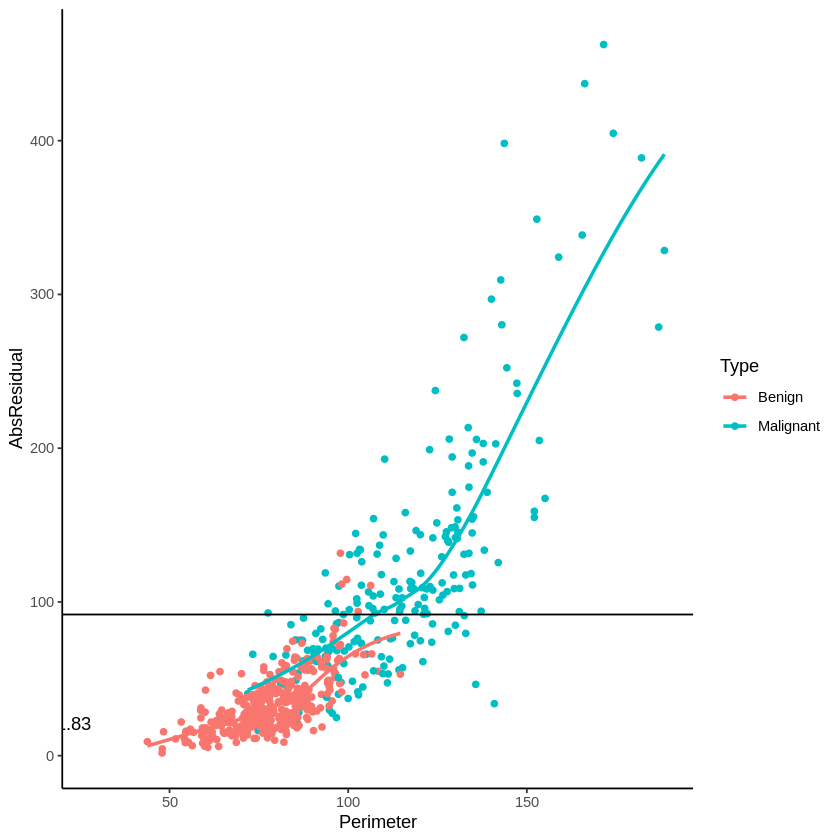

In [ ]:
#Getting a scatterplot of AbsResiudal ~ Radius
ggplot(data=BreastCancer_with_EstimatedArea_and_AbsResiduals, aes(x=Perimeter, y=AbsResidual, col=Type)) + 
  geom_point() + 
  geom_smooth(method="loess", formula=y~x,se=FALSE) + 
  # geom_abline(intercept = 13.23, slope=0) + # reference line for MAE
 # annotate(
   #        "text", label = "MAE = 13.23", hjust=1,
   #         x = 28, y = 11
    #      ) + 
  geom_abline(intercept = 91.83, slope=0) +   # reference line for RMSE
  annotate(
           "text", label = "RMSE = 91.83", hjust=1,
            x = 28, y = 21
          ) + 
  theme_classic()

It overestimates the perimeter and area of the benign tumors, because of those outliers.

8.  Do you beleive the estimated mean function used here can easily be improved upon?  In particular, is there some type of easy adjustment that could be made to this mean function to improve the fit?  [You don't need to make the adjustment, just discuss whether one would be beneficial.]

**Subtract a set amount from each value to lower the estimates and make them closer to reality.**

9.  Which is better -- a mean function on $Radius$ or a mean function based on $Perimeter$?  Discuss.

 **Radius is because the R^2 value is higher than perimeter.**

---



---
End of Document
